# Data Wrangling
#### Import Pandas

In [1]:
import pandas as pd
import matplotlib.pylab as plt

### Reading Data from URL

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df = pd.read_csv(filename, names = headers)

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identify and handle missing values

In [6]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluating for Missing Data
- insull()
- notnull()

In [7]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Count missing values in each column

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## Dealing with missing data 
#### Calculate the average of the column

In [13]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


#### Replace "NaN" by mean value in "normalized losses" column

In [14]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Calculate the mean value for "bore" column

In [15]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.329751243781096


#### Replace "Nan" by mean value

In [16]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

### Calculate the mean for the "Horsepower" column:

In [17]:
avg_hp = df["horsepower"].astype("float").mean(axis=0)
print("Average HP", avg_hp)

Average HP 104.25615763546799


In [18]:
df["horsepower"].replace(np.nan, avg_hp, inplace=True)

### Calculate the mean for the "Horsepower" column:

In [20]:
avg_price = df["price"].astype("float").mean(axis=0)
print("Average price", avg_price)

Average price 13207.129353233831


In [21]:
df["price"].replace(np.nan, avg_price, inplace=True)

In [23]:
# See which values are present in a particular column, we use the "value_counts()" method:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [24]:
df["num-of-doors"].value_counts().idxmax()

'four'

In [ ]:
# Replace by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [25]:
# Simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# Eeset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [26]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,13207.1


In [30]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Convert data types to proper format

In [33]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [34]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg          float64
price                float64
city-L/100km         float64
dtype: object

In [35]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [36]:
# Write your code below and press Shift+Enter to execute 
df["highway-mpg"] = 235/df["highway-mpg"]

# Rename
df.rename(columns={'"highway-mpg"':"highway-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,13.055556


### Data Normalization

In [37]:
# Example
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [38]:
# Write your code below and press Shift+Enter to execute 
df['height'] = df['height']/df['height'].max()

# Show the scaled columns
df[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


### Binning 

In [39]:
# Convert data to correct format
df["horsepower"]= df["horsepower"].astype(int, copy=True)

### Plot the histogram of HP

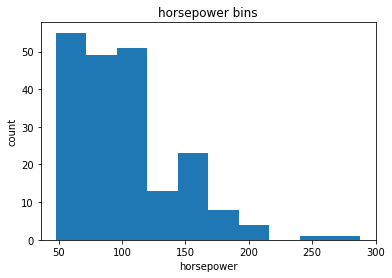

In [46]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower");
plt.pyplot.ylabel("count");
plt.pyplot.title("horsepower bins");

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

In [41]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [42]:
group_names = ['Low', 'Medium', 'High']

In [43]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [44]:
# Number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

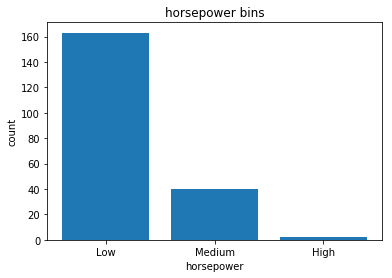

In [47]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower");
plt.pyplot.ylabel("count");
plt.pyplot.title("horsepower bins");

### Bin visualization

Text(0.5, 1.0, 'horsepower bins')

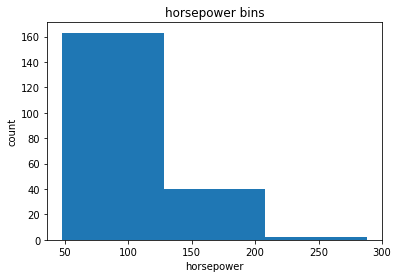

In [48]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Dummy Variable

In [67]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'diesel', 'gas'],
      dtype='object')

In [68]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

KeyError: 'fuel-type'

In [69]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [70]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

KeyError: "['fuel-type'] not found in axis"

In [71]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'diesel', 'gas',
       'diesel', 'gas'],
      dtype='object')

In [72]:
df.aspiration

0        std
1        std
2        std
3        std
4        std
5        std
6        std
7        std
8      turbo
9      turbo
10       std
11       std
12       std
13       std
14       std
15       std
16       std
17       std
18       std
19       std
20       std
21       std
22       std
23     turbo
24       std
25       std
26       std
27     turbo
28       std
29     turbo
       ...  
175      std
176      std
177      std
178      std
179      std
180      std
181      std
182      std
183      std
184      std
185      std
186      std
187    turbo
188      std
189      std
190      std
191      std
192    turbo
193      std
194      std
195      std
196      std
197      std
198    turbo
199    turbo
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [73]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [74]:
dummy_variable_2.rename(columns={'aspiration':'std', 'aspiration':'turbo'}, inplace=True)
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [75]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,diesel,gas,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,27.0,13495.0,11.190476,Low,0,1,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,27.0,16500.0,11.190476,Low,0,1,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,26.0,16500.0,12.368421,Medium,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,30.0,13950.0,9.791667,Low,0,1,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,22.0,17450.0,13.055556,Low,0,1,0,1,0,1
